In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
#sns.set_style('darkgrid')
sns.set(font_scale=3,font="simhei")

#--- 改变字体
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

#--- plt设置
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22
plt.figure(figsize=(20,10))
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

<Figure size 1440x720 with 0 Axes>

# load datasets

In [2]:
stores = pd.read_excel('./input/raw_data/stores.xlsx')
# 去掉金山
stores = stores[~stores['商圈'].isin(['金山宝大祥','奉贤新城', '刘行', '普陀中环', '紫藤路', '陕西南路'])]
print(stores.info())
stores.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 41
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   门店编码     36 non-null     object 
 1   门店名称     36 non-null     object 
 2   门店地理位置   36 non-null     object 
 3   经度       36 non-null     object 
 4   纬度       36 non-null     object 
 5   门店等级     36 non-null     object 
 6   前置仓体系门店  36 non-null     int64  
 7   实际上线时间   36 non-null     object 
 8   时效       36 non-null     object 
 9   备注       0 non-null      float64
 10  对照门店名称   36 non-null     object 
 11  环线       36 non-null     object 
 12  商圈       36 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 3.9+ KB
None


,门店编码,门店名称,门店地理位置,经度,纬度,门店等级,前置仓体系门店,实际上线时间,时效,备注,对照门店名称,环线,商圈
0,SH60,上海浦东96广场宝大祥NK店,浦东东方路796号B1楼,东经E121°31′27.89″,北纬N31°13′37.79″,A,1,2018-04-20,4小时达,NaN,上海宝大祥青少年儿童购物中心浦东96广场,内环,世纪大道
1,SH15,上海黄浦南京东路宝大祥NK店,黄浦区南京东路685号宝大祥青少年儿童购物中心1楼,东经E121°28′38.81″,北纬N31°14′7.78″,A+,1,2018-03-20,1小时达,NaN,宝大祥青少年儿童购物(集团)股份有限公司,内环,南京东路
2,SH55,上海黄浦市百一店NK店,上海市黄浦区南京东路830号4楼阿迪达斯童装,东经E121°28′30.00″,北纬N31°14′11.86″,B+,1,2018-04-13,4小时达,NaN,上海市第一百货商店股份有限公司,内环,南京东路
3,SH25,上海黄浦置地广场NK店,黄浦区南京东路409-459号8楼,东经E121°28′55.69″,北纬N31°14′12.05″,B,1,2018-04-13,1小时达,NaN,上海置地广场商厦有限公司,内环,南京东路
4,SH08,上海黄浦新世界NK店,黄浦区南京西路2-88号8楼,东经E118°53′28.71″,北纬N32°03′48.79″,A+,1,2018-04-13,1小时达,NaN,新世界股份有限公司,内环,南京东路


In [3]:
sales = pd.read_excel('./input/raw_data/sales.xlsx', parse_dates=['销售时间'])

In [4]:
sales.loc[sales['数量']<=0, '数量'] = 0
sales.head()

,销售单号,门店编码,销售时间,商品编码,数量,实际售价
0,NaN,TMSH162,2018-09-09,814443N140406Y,1,299.0
1,NaN,TMSH01,2018-04-30,652966L141405C,2,394.8
2,NaN,TMSH162,2018-08-30,599729N161204Y,1,219.0
3,NaN,TMSH162,2018-08-31,859579N140103Y,1,249.0
4,NaN,TMSH162,2018-08-31,870022N170006Y,1,199.0


In [5]:
sales['商品编码'] = [s[:6] for s in sales['商品编码']]
sales.head()

,销售单号,门店编码,销售时间,商品编码,数量,实际售价
0,NaN,TMSH162,2018-09-09,814443,1,299.0
1,NaN,TMSH01,2018-04-30,652966,2,394.8
2,NaN,TMSH162,2018-08-30,599729,1,219.0
3,NaN,TMSH162,2018-08-31,859579,1,249.0
4,NaN,TMSH162,2018-08-31,870022,1,199.0


In [6]:
store_sales = sales[['门店编码','销售时间','商品编码','数量']].merge(stores[['门店编码','商圈']], how='left').dropna()
store_sales = store_sales[['销售时间','商品编码','数量','商圈']]
store_sales.head()

,销售时间,商品编码,数量,商圈
14,2018-10-13,881926,1,莘庄
15,2018-10-24,AQ9976,1,莘庄
16,2018-09-01,AA7216,1,莘庄
17,2018-09-16,343738,1,莘庄
18,2018-02-12,917859,1,莘庄


In [7]:
shangquan = store_sales['商圈'].unique()
for col in store_sales.columns:
    print(col, '_unique:', len(store_sales[col].unique()))

销售时间 _unique: 761
商品编码 _unique: 1506
数量 _unique: 136
商圈 _unique: 23


In [8]:
mall_sales = store_sales.groupby(['商圈','商品编码','销售时间']).sum().reset_index()
mall_sales.head()

,商圈,商品编码,销售时间,数量
0,七宝,314193,2017-12-09,1
1,七宝,314193,2017-12-13,1
2,七宝,314193,2017-12-20,1
3,七宝,314193,2017-12-28,1
4,七宝,314193,2017-12-29,1


In [9]:
mall_sku_sales = {key: mall_sales.loc[value] for key, value in mall_sales.groupby(['商圈','商品编码',]).groups.items()}
mall_sales = {}
for key, value in mall_sku_sales.items():
    mall_sales[key] = value.set_index('销售时间').resample('w').sum().fillna(0).reset_index()


In [176]:
mall_sale = []
for (mall, skuid), value in mall_sales.items():
    value['商圈'] = mall
    value['商品编码'] = skuid
    mall_sale.append(value)
mall_sale = pd.concat(mall_sale, ignore_index=True)

In [265]:
mall_sale.head()
# mall_sale = mall_sale[~mall_sale['商品编码'].isin(['343738', '343938'])]
date_start_2017, date_end_2017 = '20170717', '20171112'
date_start_2018, date_end_2018 = '20180716', '20181209'

In [266]:
date_range = pd.date_range(start=date_start_2017, end=date_end_2017, freq='w')  # 20180611 is Monday
top_skus = mall_sale[mall_sale['销售时间'].isin(date_range)].groupby(['商品编码']).sum().sort_values(by='数量', ascending=False).index[:10].tolist()
top_skus = ['AA7217']
print(top_skus)
mall_sale[mall_sale['销售时间'].isin(date_range)].groupby(['商品编码']).sum().reset_index().sort_values(by=['数量'], ascending=False).head(10)

['AA7217']


,商品编码,数量
2,343738,6688
3,343938,5905
463,917859,2555
417,881927,2199
499,AA7217,1786
498,AA7216,1694
464,917860,1686
262,834365,1508
414,881924,1252
263,834366,1072


D:\software\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


105.05882352941177


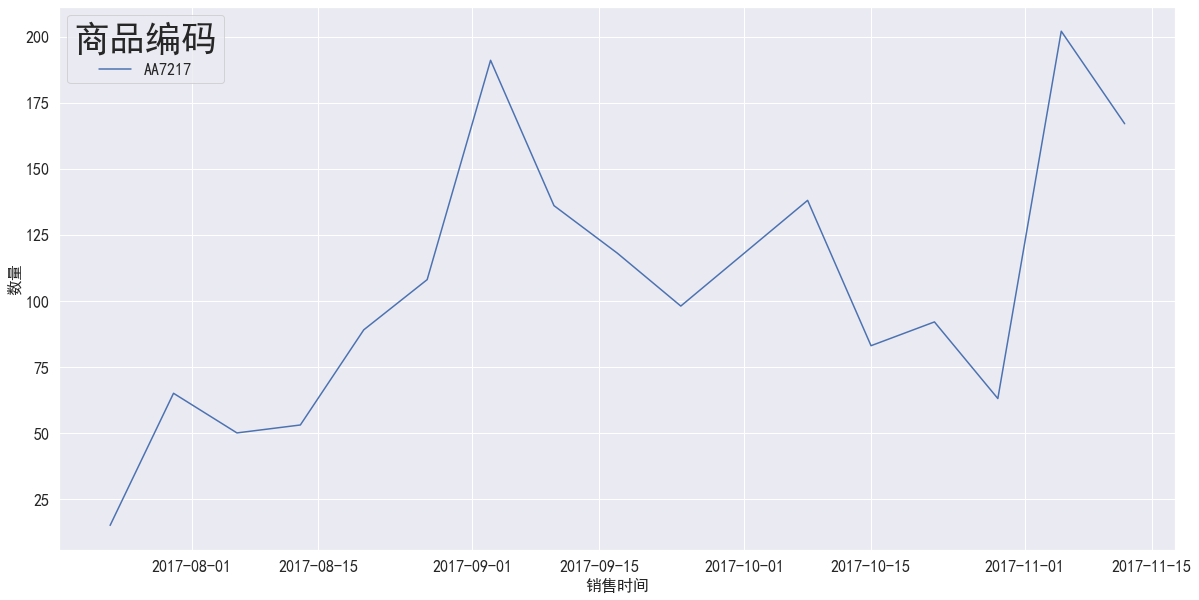

In [267]:
plt.figure(figsize=(20,10))
_ = mall_sale[mall_sale['销售时间'].isin(date_range)][mall_sale['商品编码'].isin(top_skus)].groupby(['商品编码','销售时间']).sum().reset_index()
sns.lineplot(x='销售时间',y='数量',hue='商品编码',
           data=_)
print(_['数量'].mean())

In [268]:
mall_sale[mall_sale['销售时间'].isin(date_range)][mall_sale['商品编码'].isin(top_skus)].groupby(['商品编码','销售时间']).sum().reset_index()

D:\software\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,商品编码,销售时间,数量
0,AA7217,2017-07-23,15
1,AA7217,2017-07-30,65
2,AA7217,2017-08-06,50
3,AA7217,2017-08-13,53
4,AA7217,2017-08-20,89
5,AA7217,2017-08-27,108
6,AA7217,2017-09-03,191
7,AA7217,2017-09-10,136
8,AA7217,2017-09-17,118
9,AA7217,2017-09-24,98


D:\software\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


99.52380952380952


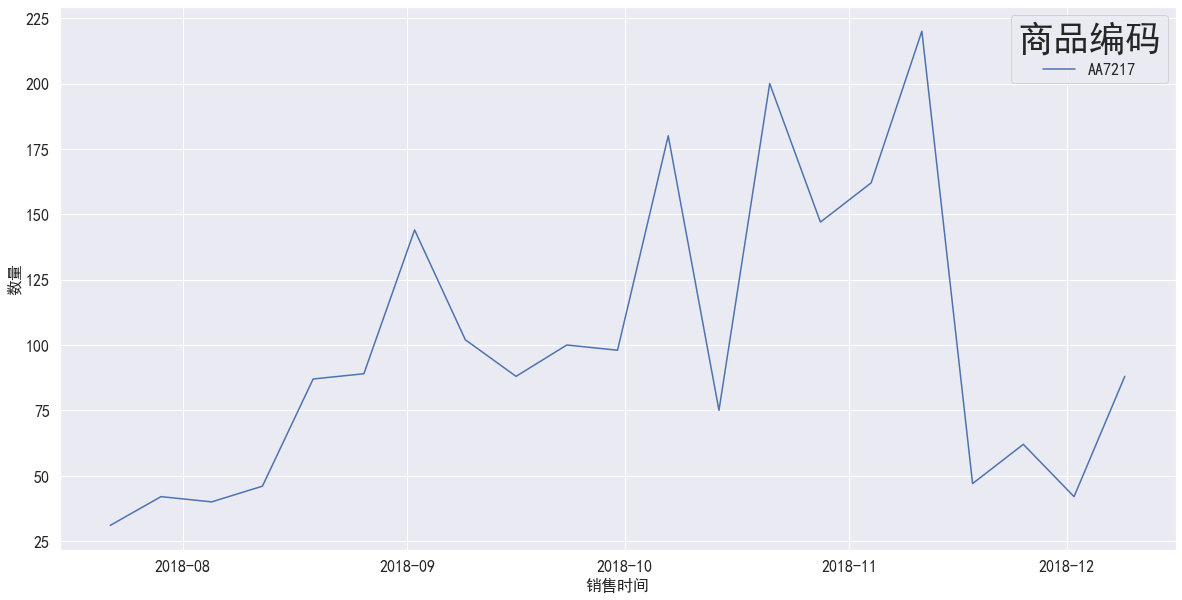

In [269]:
plt.figure(figsize=(20,10))
date_range_2018 = pd.date_range(date_start_2018, date_end_2018, freq='w')
_ = mall_sale[mall_sale['销售时间'].isin(date_range_2018)][mall_sale['商品编码'].isin(top_skus)].groupby(['商品编码','销售时间']).sum().reset_index()
sns.lineplot(x='销售时间',y='数量',hue='商品编码',
           data=_)
print(_['数量'].mean())

In [270]:
mall_sale[mall_sale['销售时间'].isin(date_range_2018)][mall_sale['商品编码'].isin(top_skus)].groupby(['商品编码','销售时间']).sum().reset_index()

D:\software\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,商品编码,销售时间,数量
0,AA7217,2018-07-22,31
1,AA7217,2018-07-29,42
2,AA7217,2018-08-05,40
3,AA7217,2018-08-12,46
4,AA7217,2018-08-19,87
5,AA7217,2018-08-26,89
6,AA7217,2018-09-02,144
7,AA7217,2018-09-09,102
8,AA7217,2018-09-16,88
9,AA7217,2018-09-23,100


In [271]:
data = mall_sale[mall_sale['销售时间'].isin(np.concatenate([date_range,date_range_2018]))][mall_sale['商品编码'].isin(top_skus)]
data.head()

D:\software\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,销售时间,数量,商圈,商品编码
11342,2017-07-30,1,七宝,AA7217
11343,2017-08-06,4,七宝,AA7217
11344,2017-08-13,5,七宝,AA7217
11345,2017-08-20,7,七宝,AA7217
11346,2017-08-27,6,七宝,AA7217


In [272]:
data['商品编码'].unique()

array(['AA7217'], dtype=object)

In [273]:
_2017 = data[data['销售时间'].isin(date_range)]
_2018 = data[data['销售时间'].isin(date_range_2018)]
data_2017 = {key: _2017.loc[value] for key, value in _2017.groupby('商品编码').groups.items()}
data_2018 = {key: _2018.loc[value] for key, value in _2018.groupby('商品编码').groups.items()}

In [274]:
 def Calculate_Pearson(shangquan, sku_sales, date_start, date_end):
    n = len(shangquan)
    pearson_p_value = [['']*n for _ in range(n)]
    pearson = np.zeros(shape=(n ,n))
    for i in range(n):
        for j in range(n):
            ret = scipy.stats.pearsonr(sku_sales.values.T[i], sku_sales.values.T[j])
            pearson[i][j] = ret[0]
            p_value = np.floor(ret[1]*100)/100.0
            pearson_p_value[i][j] += '%.2f' %p_value
            if 0.05<p_value<=0.1:
                pearson_p_value[i][j] += '*'
            elif 0.01<p_value<=0.05:
                pearson_p_value[i][j] += '**'
            elif p_value<=0.01:
                pearson_p_value[i][j] += '***'
    pearson = pd.DataFrame(pearson)
    pearson_p_value = pd.DataFrame(pearson_p_value)
    pearson.columns, pearson_p_value.columns = shangquan, shangquan
    pearson.index, pearson_p_value.index = shangquan, shangquan
    return pearson, pearson_p_value
    
import os
import scipy
for sku in data['商品编码'].unique():
    try:
        sku1_2017 = data_2017[sku].set_index(['销售时间','商圈'])['数量'].unstack().fillna(0)
        sku1_2018 = data_2018[sku].set_index(['销售时间','商圈'])['数量'].unstack().fillna(0)
        shangquan = set(sku1_2017.columns).intersection(sku1_2018.columns) 
        if not os.path.exists('./input/%s' %sku):
            os.makedirs('./input/%s' %sku)

        sku1_2017.to_excel('./input/%s/%s_%s_sales.xlsx' % (sku, date_start_2017, date_end_2017))
        sku1_2018.to_excel('./input/%s/%s_%s_sales.xlsx' % (sku, date_start_2018, date_end_2018))
        
        cov = pd.DataFrame(np.cov(sku1_2017.values.T))
        cov.to_excel('./input/%s/%s_%s_cov.xlsx' % (sku, date_start_2017, date_end_2017))
        cov = pd.DataFrame(np.cov(sku1_2018.values.T))
        cov.to_excel('./input/%s/%s_%s_cov.xlsx' % (sku, date_start_2018, date_end_2018))
        
        
        pearson, pearson_p_value = Calculate_Pearson(shangquan, sku1_2017, date_start_2017, date_end_2017)
        pearson.to_excel('./input/%s/%s_%s_pearson.xlsx' % (sku, date_start_2017, date_end_2017))
        pearson_p_value.to_excel('./input/%s/%s_%s_pearson_p_value.xlsx' % (sku, date_start_2017, date_end_2017))
        
        pearson, pearson_p_value = Calculate_Pearson(shangquan, sku1_2018, date_start_2018, date_end_2018)
        pearson.to_excel('./input/%s/%s_%s_pearson.xlsx' % (sku, date_start_2018, date_end_2018))
        pearson_p_value.to_excel('./input/%s/%s_%s_pearson_p_value.xlsx' % (sku, date_start_2018, date_end_2018))   
        
    except Exception as e:
        print(e)

In [68]:
set(stores['商圈'].unique())-set(sku1_2017.columns)

{'刘行', '普陀中环', '紫藤路', '陕西南路'}

In [69]:
shangquan

Index(['七宝', '世博源', '世纪大道', '五莲路', '五角场', '共康路', '南京东路', '周浦', '嘉松中路', '娄山关路',
       '宝山巴黎春天', '宝山白玉兰广场', '徐家汇', '江浦路地铁站', '浦东巴黎春天', '浦东金汇广场', '环球港', '莘庄',
       '莲花路', '虹桥天地', '金运路', '陆家嘴', '静安寺'],
      dtype='object', name='商圈')

# Graph

In [292]:
rider_speed = 18  # XX km/hr
Aplus_time_limit = 1  # A+ store must be fulfilled within X hr(s)
allowed_rider_travel_time = 1  # X hrs allowed for riders on the way


distance = pd.read_excel('./input/network_distance.xlsx', index_col=0)
shangquan_1hr_arrival = ['南京东路', '静安寺', '世纪大道', '陆家嘴', '五角场']
shangquan_1hr_arrival_cols = []
for k, col in enumerate(distance.columns):
    if col in shangquan_1hr_arrival:
        shangquan_1hr_arrival_cols.append(k)

travel_time = distance.values/rider_speed
graph = np.where(travel_time<=allowed_rider_travel_time, 1, 0)
for k in shangquan_1hr_arrival_cols:
    graph[:, k] = np.where(travel_time[:, k] <= Aplus_time_limit, 1, 0)
print(graph)
#pd.DataFrame(graph, index=distance.index, columns=distance.columns).to_excel('./input/graph.xlsx')

[[1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1]
 [0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1]
 [0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1]
 [0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1]]


In [294]:
graph.sum(axis=0)

array([3, 4, 4, 3, 3, 3, 6, 2, 1, 5, 4, 2, 4, 4, 4, 1, 5, 3, 3, 2, 1, 4,
       5])

In [120]:
np.asarray([4.26, 6.36, 2.21, 5.39, 3.29, 3.82, 3.79])*200*7

array([5964., 8904., 3094., 7546., 4606., 5348., 5306.])

In [44]:
343738  5258/30291

0.04166666666666667

In [218]:
date_range = pd.date_range(start='2017-1-1', end='2017-4-2', freq='w')
mall_sale[mall_sale['销售时间'].isin(date_range)]['数量'].sum()

45436

In [229]:
_ = mall_sale[mall_sale['销售时间'].isin(date_range)]
_ = _.groupby('商品编码')[['数量']].sum().sort_values('数量', ascending=False).iloc[:40, :]
_['数量'].sum()

30291

In [295]:
5258/30291

0.17358291241622925

0.52

In [207]:
sales.groupby('商品编码')['数量'].sum().sort_values(ascending=False).iloc[:10]

商品编码
343738    42515
343938    40152
917859    11622
AA7216     9664
881927     8657
905220     6162
AA7217     5544
847569     5313
844105     5310
881926     5255
Name: 数量, dtype: int64

In [218]:
_ = sales[sales['商品编码']=='917859']
min(_['销售时间'])

Timestamp('2017-06-09 00:00:00')

In [246]:
_ = mall_sale[mall_sale['销售时间'].isin(date_range)][mall_sale['商品编码'].isin(top_skus)].groupby(['商品编码','销售时间']).sum().reset_index()

D:\software\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [247]:
_

,商品编码,销售时间,数量
0,AA7217,2017-07-23,15
1,AA7217,2017-07-30,65
2,AA7217,2017-08-06,50
3,AA7217,2017-08-13,53
4,AA7217,2017-08-20,89
...,...,...,...
76,AA7217,2019-01-06,171
77,AA7217,2019-01-13,6
78,AA7217,2019-01-20,13
79,AA7217,2019-01-27,4


In [248]:
for idx, row in _[['销售时间','数量']].iterrows():
    print(row['销售时间'], row['数量'])

2017-07-23 00:00:00 15
2017-07-30 00:00:00 65
2017-08-06 00:00:00 50
2017-08-13 00:00:00 53
2017-08-20 00:00:00 89
2017-08-27 00:00:00 108
2017-09-03 00:00:00 191
2017-09-10 00:00:00 136
2017-09-17 00:00:00 118
2017-09-24 00:00:00 98
2017-10-01 00:00:00 118
2017-10-08 00:00:00 138
2017-10-15 00:00:00 83
2017-10-22 00:00:00 92
2017-10-29 00:00:00 63
2017-11-05 00:00:00 202
2017-11-12 00:00:00 167
2017-11-19 00:00:00 6
2017-11-26 00:00:00 2
2017-12-03 00:00:00 1
2017-12-10 00:00:00 4
2017-12-17 00:00:00 6
2017-12-24 00:00:00 0
2017-12-31 00:00:00 1
2018-01-07 00:00:00 0
2018-01-14 00:00:00 3
2018-01-21 00:00:00 1
2018-01-28 00:00:00 1
2018-02-04 00:00:00 0
2018-02-11 00:00:00 1
2018-02-18 00:00:00 3
2018-02-25 00:00:00 2
2018-03-04 00:00:00 0
2018-03-11 00:00:00 4
2018-03-18 00:00:00 0
2018-03-25 00:00:00 0
2018-04-01 00:00:00 0
2018-04-08 00:00:00 0
2018-04-15 00:00:00 0
2018-04-22 00:00:00 0
2018-04-29 00:00:00 0
2018-05-06 00:00:00 0
2018-05-13 00:00:00 0
2018-05-20 00:00:00 0
2018-05